Python-13. Визуализация данных
Анализ данных об оттоке клиентов некоторого банка

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
# Reading raw data
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Ratio of exited and loyal customers')

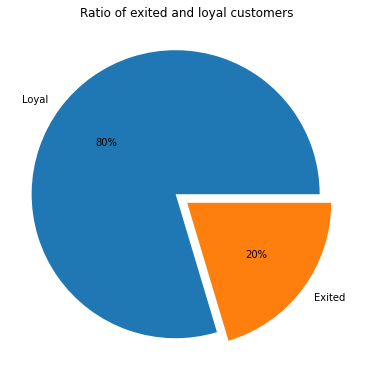

In [5]:
# 9.1 Каково соотношение ушедших и лояльных клиентов?
exited_info = churn_data['Exited'].value_counts()

labels_list = ['Loyal', 'Exited']

fig_9_1 = plt.figure(figsize=(5,5), facecolor='white')
axes_9_1 = fig_9_1.add_axes([0,0,1,1])
axes_9_1.pie(
    exited_info,
    explode=[0.1, 0],
    labels=labels_list,
    autopct='%.0f%%',
);

axes_9_1.set_title('Ratio of exited and loyal customers')

Ответ 9.1: По результатам анализа соотношения числа ушедших и лояльных клиентов, можно сделать вывод, что каждый пятый клиент отказался от услуг банка.

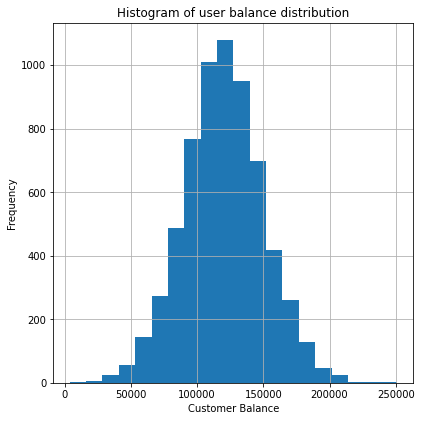

In [ ]:
# 9.2 Постройте график, показывающий распределение баланса пользователей,
# у которых на счету больше 2 500 долларов.

balance_mask = churn_data['Balance'] > 2500
balance_filtered = churn_data[balance_mask]

fig_9_2 = plt.figure(figsize=(5,5), facecolor='white')
axes_9_2 = fig_9_2.add_axes([0,0,1,1])
axes_9_2.hist(
    x=balance_filtered['Balance'],
    label='Balance',
    bins=20
);

axes_9_2.set_title('Histogram of user balance distribution')
axes_9_2.grid()
axes_9_2.set_xlabel('Customer Balance')
axes_9_2.set_ylabel('Frequency');

Ответ 9.2: Баланс на счетах клиентов (у которых баланс составляет более 2500 $) имеет вид нормального распределения. Медианное значение баланса составляет порядка 120 тыс. долларов.

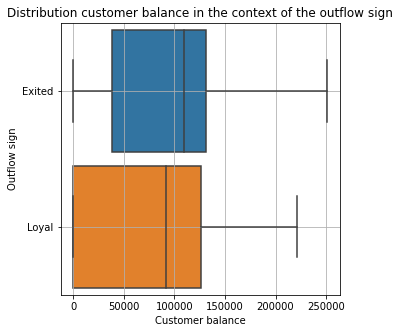

In [ ]:
# 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока.

churn_data['Outflow'] = churn_data['Exited'].apply(
    lambda x: 'Loyal' if x == 0 else 'Exited'
)

fig_9_3 = plt.figure(figsize=(5,5), facecolor='white')

boxplot = sns.boxplot(
    data=churn_data,
    y='Outflow',
    x='Balance',
    orient='h',
    width=0.9
)

boxplot.set_title('Distribution customer balance in the context of the outflow sign')
boxplot.set_ylabel('Outflow sign')
boxplot.set_xlabel('Customer balance')
boxplot.grid();

Ответ 9.3: Суммы на накопительном счете ушедших клиентов имеют меньшее значения разброса. Медианное значение сумм на накопительном счете ушедших из банка клиентов превышают медианное значение сумм на накопительном счете лояльных клиентов. Более высокое медианное значение сумм на счетах ушедших клиентов , может говорить о том, что причиной их ухода могли послужить не выгодные условия хранения на накопительном счете крупнных сумм денег.

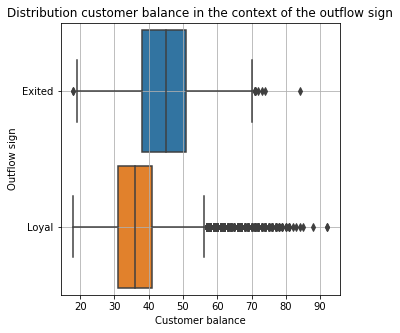

In [ ]:
# 9.4 Посмотрите на распределение возраста в разрезе признака оттока

fig_9_4 = plt.figure(figsize=(5,5), facecolor='white')

boxplot = sns.boxplot(
    data=churn_data,
    y='Outflow',
    x='Age',
    orient='h',
    width=0.9
)

boxplot.set_title('Distribution customer balance in the context of the outflow sign')
boxplot.set_ylabel('Outflow sign')
boxplot.set_xlabel('Customer balance')
boxplot.grid();

Ответ 9.4: По результатам анализа графика следует вывод о том, что среди лояльных клиентов выбросов значений возраста больше. Основная масса лояльных клиентов сконцентрирована в диапазоне от 30 до 40 лет. Основная масса ушедших клиентов входит в возврастную группу от 40 до 50 лет, банку необходимо сконцентироваться на данной возврастной группе, чтобы снизик отток клиентов.

In [ ]:
# 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента
# и его предполагаемой зарплаты.

fig_9_5 = px.scatter(
    data_frame=churn_data,
    x=churn_data['CreditScore'],
    y=churn_data['EstimatedSalary'],
    color=churn_data['Outflow'],
    width=700,
    height=500,
    range_y=[0,200000],
    title="The relationship between the client's credit rating and his expected salary"
)

fig_9_5.show()

Ответ 9.5: По результатам анализа диаграммы рассеяния можно сделать вывод, что зависимость предполагаемого уровня заработной платы от кредитного рейтинга отсутствует.

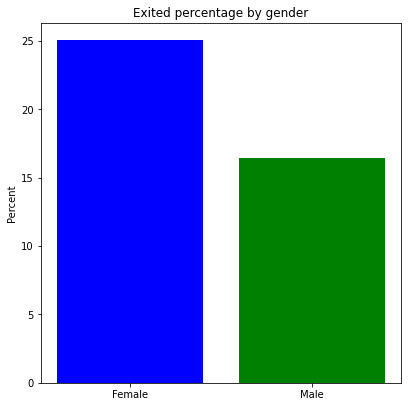

In [6]:
# 9.6 Кто чаще уходит, мужчины или женщины?
gender_filtred = churn_data.groupby(['Gender'])['Exited'].mean()*100

fig_9_6 = plt.figure(figsize=(5,5), facecolor='white')
axes_9_6 = fig_9_6.add_axes([0,0,1,1])

axes_9_6.bar(
    x=gender_filtred.index,
    height=gender_filtred.values,
    color=['blue', 'green']
);

axes_9_6.set_ylabel('Percent')
axes_9_6.set_title('Exited percentage by gender');

Ответ 9.6: По результатам анализа графика следует вывод о том, что женщины чаще отказываются от услуг банка чем мужчины. Среди девушек процент ушедших клиентов составляе порядка 25%, у мужчин данный показатель меньше и равен порядка 16,5%.

In [ ]:
# 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг?

outflow_grouped = churn_data.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

fig_9_7 = px.bar(
    data_frame=outflow_grouped,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    height=500,
    width=700,
    title='Customers outflow in context of NumOfProducts'
)

fig_9_7.show()

Ответ 9.7: Отток в группе клиентов, которые приобрели от 3 до 4 продуктов банка, имеет больший процент от общего числа по группе чем отток клиентов, которые приобрели от 1 до 2 продуктов банка.

In [ ]:
# 9.8 Как влияет наличие статуса активного клиента на отток клиентов?

active_grouped = churn_data.groupby(by=['IsActiveMember', 'Outflow'], as_index=False)['RowNumber'].count()
print(active_grouped)

labels_list = ['Exited', 'Loyal']

fig_9_8 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_9_8.add_trace(go.Pie(
    labels=active_grouped[active_grouped['IsActiveMember']==0]['Outflow'],
    values=active_grouped[active_grouped['IsActiveMember']==0]['RowNumber'],
    name='Not active member'
), 1, 1)
fig_9_8.add_trace(go.Pie(
    labels=active_grouped[active_grouped['IsActiveMember']==1]['Outflow'],
    values=active_grouped[active_grouped['IsActiveMember']==1]['RowNumber'],
    name='Active member'
), 1, 2)

fig_9_8.update_traces(hole=.5, hoverinfo='label+percent+name')

fig_9_8.update_layout(
    title_text='Impact of active status to outflow',
    annotations=[dict(text='Not active member', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='Active member', x=0.83, y=0.5, font_size=12, showarrow=False)]
)

fig_9_8.show()

   IsActiveMember Outflow  RowNumber
0               0  Exited       1302
1               0   Loyal       3547
2               1  Exited        735
3               1   Loyal       4416


Ответ 9.8: Отток клиентов среди не активных клиентов составляет больший процент (26,9% против 14,3% среди активных клиентов). Банку можно предложить сконцентрировать внимание на не активных клиентах, например организовать процесс формирования предложений, направленных на приобритение различного рода продуктов банка.

In [15]:
# 9.9 В какой стране доля ушедших клиентов больше

country_grouped = churn_data.groupby(by=['Geography'], as_index=False)['Exited'].mean()
country_grouped_2 = churn_data.groupby(by=['Geography'])['IsActiveMember'].sum()
print(country_grouped)
print(country_grouped_2)

fig_9_9 = px.choropleth(
    data_frame=country_grouped,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    #range_color=[0,30e6],
    title='The share of exited customers',
    width=800,
    height=500,
    #color_continuous_scale='red'
)

fig_9_9.show()

  Geography    Exited
0    France  0.161548
1   Germany  0.324432
2     Spain  0.166734
Geography
France     2591
Germany    1248
Spain      1312
Name: IsActiveMember, dtype: int64


Ответ 9.9: По результатам анализа тепловой карты следует вывод о том, что наиболее высокий процент ушедших клиентов находится в Германии. Данный факт, вероятно, может быть обусловлен высокой конкуренцией в стране, и менее выгодными по сравнению с другими банками условия.

Text(0.5, 1.0, 'Heat of CreditScoreCat/Tenure')

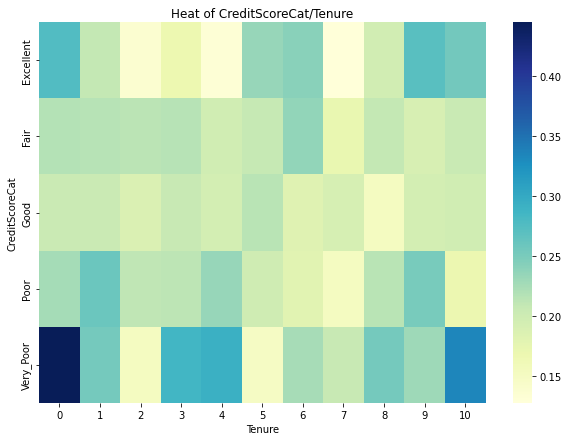

In [30]:
# 9.10 Постройте тепловую карту с аннотацией.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

fig_9_10 = plt.figure(figsize=(10,7), facecolor='white')
score_table = pd.pivot_table(
    churn_data,
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean',
)

heatmap = sns.heatmap(data=score_table, cmap='YlGnBu')
heatmap.set_title('Heat of CreditScoreCat/Tenure')

Ответ 9.10: По результатам анализа тепловой карты можно сделать вывод, что наиболее часто уходят клиенты из группы кредитного рейтинга "Very Poor" и сроком пользования услугами банка менее года.